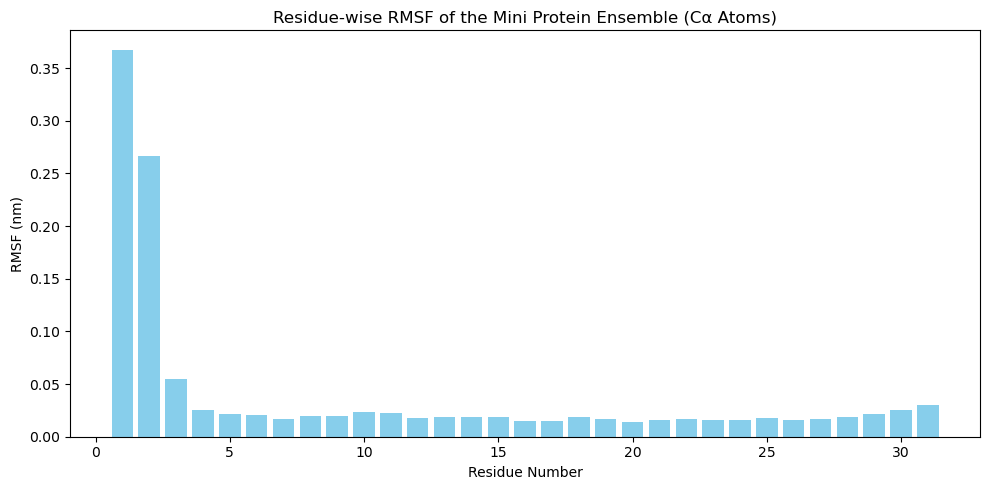

In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import glob

file_list = glob.glob('/home/yhp2008/comp-lab-class-2024/Week7-Alphafold/AF2_Part3/test_5c7bb_unrelaxed_rank_*_alphafold2_ptm_model_*_seed_*.pdb')
if not file_list:
    raise FileNotFoundError("No PDB files found with the specified pattern.")
traj = md.load(file_list)
traj.superpose(traj[0])
ca_indices = traj.topology.select('name CA')
rmsf = md.rmsf(traj, traj[0], atom_indices=ca_indices)
residue_ids = [traj.topology.atom(i).residue.resSeq for i in ca_indices]
plt.figure(figsize=(10, 5))
plt.bar(residue_ids, rmsf, color='skyblue')
plt.xlabel('Residue Number')
plt.ylabel('RMSF (nm)')
plt.title('Residue-wise RMSF of the Mini Protein Ensemble (Cα Atoms)')
plt.tight_layout()
plt.show()